In [17]:
# Pandas library for the pandas dataframes and other plotting tools
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import Scikit-Learn library for models
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix # plotting confusion matrix 
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

# For confusion matrix count
from collections import Counter

### Data

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
K_neighbors = 10
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### kNN Prediction (User Input)

In [5]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    y_pred = clf.predict(test_data)
    
    return y_pred

### Sample Train, Test, Splits Results

In [6]:
def sample_results():
    '''
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    ones_incorrect = 0
    zeros_incorrect = 0    
    y_test_list = list(y_test)
    y_pred_list = list(y_pred)
    for test, pred in zip(y_test_list, y_pred_list):
        if test == 0 and test != pred:
            zeros_incorrect += 1
        elif test == 1 and test != pred:
            ones_incorrect += 1
        else:
            pass
    zeros_true, ones_true = y_test.value_counts()
    zeros_correct = zeros_true - zeros_incorrect
    ones_correct = ones_true - ones_incorrect
    confusion_array = [[zeros_correct, zeros_incorrect],
                        [ones_incorrect, ones_correct]]
    df_confusion = pd.DataFrame(confusion_array, index=["0", "1"], columns=["0", "1"])
    print("Mean accuracy of prediction", clf.score(X_test, y_test))
    print("The following table is the classification report for model predictions: ")
    print(classification_report(y_test, y_pred))
    print("The confusion matrix for the sample dataset using kNN Neighbors is displayed below: ")
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.set(font_scale=1.5)
    ax.set_xlabel('Predicted label', fontsize=15)
    ax.set_ylabel("True label", fontsize=15)
    sns.heatmap(df_confusion, annot=True, cmap='viridis', ax=ax)
#     plt.figure(figsize = (10,7))
#     plt.show()

Mean accuracy of prediction 0.9385964912280702
The following table is the classification report for model predictions: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

The confusion matrix for the sample dataset using kNN Neighbors is displayed below: 


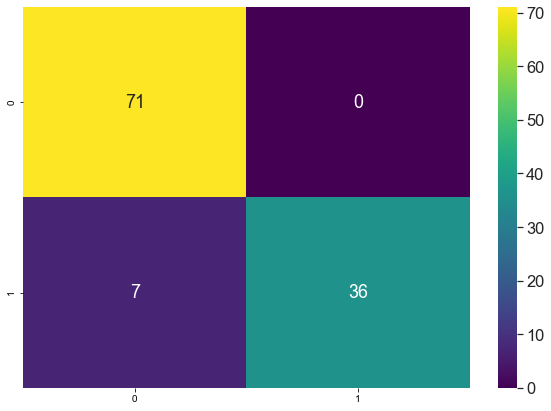

In [7]:
sample_results()

### Backwards Stepwise Feature Selection

In [13]:
#Defining Dataset Input Features and Outputs
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
   'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

In [19]:
input_features_count = [1, 2, 3, 4, 5, 6, 7, 8, 9]

list_test_mse = []
list_test_R2 = []
list_test_accuracy = []

list_training_mse = []
list_training_R2 = []
list_training_accuracy = []

selected_features = []

K_neighbors = 10
classifier = neighbors.KNeighborsClassifier(K_neighbors)

for count in input_features_count:
    sfs_backward = SequentialFeatureSelector(classifier,
                                         n_features_to_select=(count),
                                         direction='backward').fit(X, y)

    f_names = np.array(X.columns)
    selected = sfs_backward.get_support(indices=True)
    X_selected = data[f_names[selected]]
    selected_features.append(f_names[selected])
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    clf_knn = neighbors.KNeighborsClassifier(K_neighbors)
    clf_knn = clf_knn.fit(X_train_selected, y_train_selected)
    
    y_test_pred = clf_knn.predict(X_test_selected)
    list_test_mse.append(mean_squared_error(y_test_selected, y_test_pred))
    list_test_R2.append(r2_score(y_test_selected, y_test_pred))
    list_test_accuracy.append(accuracy_score(y_test_selected, y_test_pred))
    
    y_train_pred = clf_knn.predict(X_train_selected)
    list_training_mse.append(mean_squared_error(y_train_selected, y_train_pred))
    list_training_R2.append(r2_score(y_train_selected, y_train_pred))
    list_training_accuracy.append(accuracy_score(y_train_selected, y_train_pred))

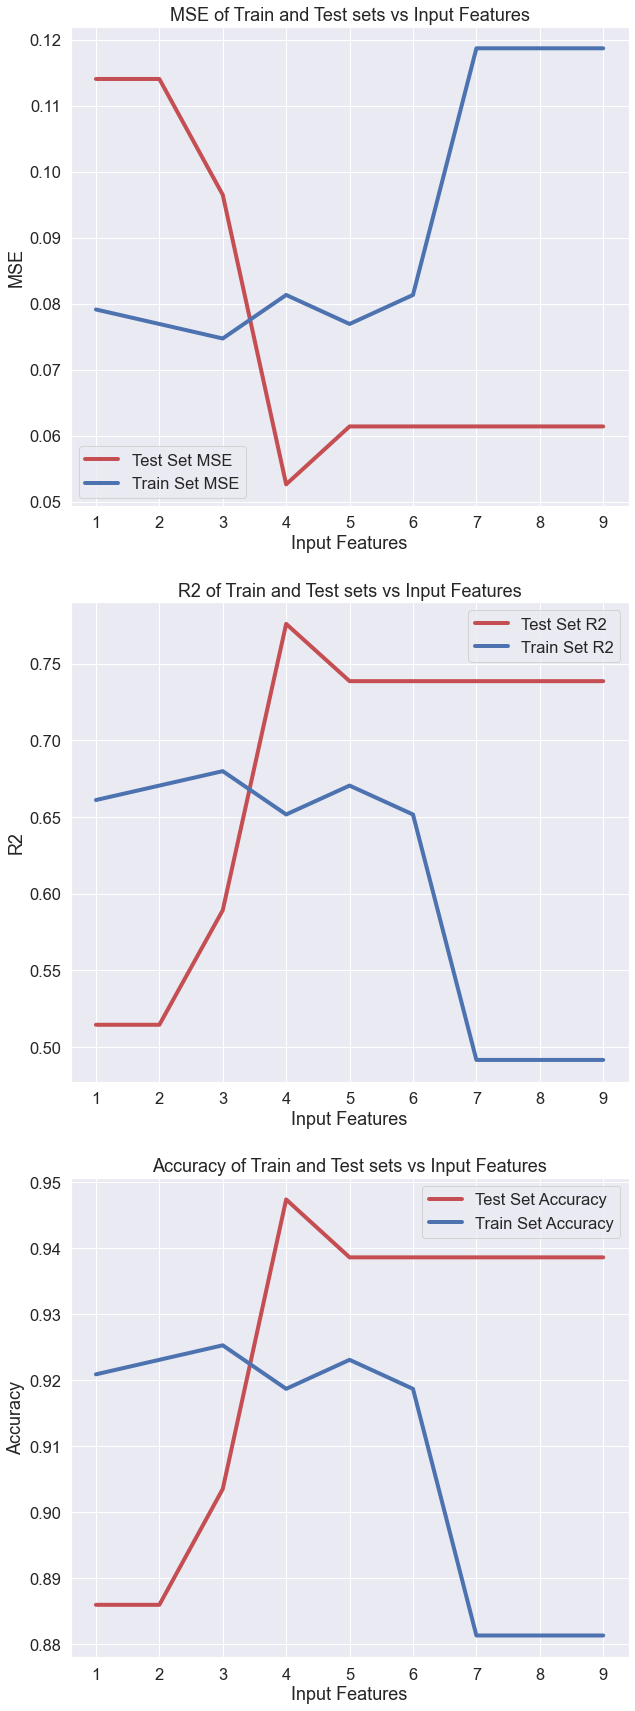

In [20]:
nrows = 3
fig = plt.figure(figsize=(10, nrows * 10))
ax = fig.subplots(nrows=nrows, ncols=1)

ax[0].plot(input_features_count, list_test_mse, label='Test Set MSE', c='r', linewidth=4)
ax[0].plot(input_features_count, list_training_mse, label='Train Set MSE', c='b', linewidth=4)
ax[0].set_xlabel('Input Features')
ax[0].set_ylabel('MSE')
ax[0].set_title('MSE of Train and Test sets vs Input Features')
ax[0].legend()

ax[1].plot(input_features_count, list_test_R2, label='Test Set R2', c='r', linewidth=4)
ax[1].plot(input_features_count, list_training_R2, label='Train Set R2', c='b', linewidth=4)
ax[1].set_xlabel('Input Features')
ax[1].set_ylabel('R2')
ax[1].set_title('R2 of Train and Test sets vs Input Features')
ax[1].legend()

ax[2].plot(input_features_count, list_test_accuracy, label='Test Set Accuracy', c='r', linewidth=4)
ax[2].plot(input_features_count, list_training_accuracy, label='Train Set Accuracy', c='b', linewidth=4)
ax[2].set_xlabel('Input Features')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy of Train and Test sets vs Input Features')
ax[2].legend()

In [22]:
selected_features[4]

array(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean'], dtype=object)